<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/MNIST_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
import keras.backend as K
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [0]:
# parameters
n_steps = 28 # 28 rows
n_inputs = 28 # 28 cols
n_outputs = 10 # 10 classes

In [0]:
X_train = x_train.reshape(-1,n_steps,n_inputs)
X_test = x_test.reshape(-1,n_steps,n_inputs)

In [8]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [0]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
K.clear_session()
model = Sequential()
model.add(LSTM(28,input_shape=(28,28)))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 6,674
Trainable params: 6,674
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train,y_train_cat,epochs=10,batch_size=32,verbose=1,validation_data=(X_test,y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.9909 - acc: 0.6640 - val_loss: 0.6272 - val_acc: 0.7888
Epoch 2/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.5663 - acc: 0.8086 - val_loss: 0.5147 - val_acc: 0.8266
Epoch 3/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.4945 - acc: 0.8315 - val_loss: 0.4674 - val_acc: 0.8372
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.4490 - acc: 0.8467 - val_loss: 0.4253 - val_acc: 0.8528
Epoch 5/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.4156 - acc: 0.8584 - val_loss: 0.4093 - val_acc: 0.8613
Epoch 6/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3972 - acc: 0.8666 - val_loss: 0.3900 - val_acc: 0.8696
Epoch 7/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.3809 - acc: 0.8702 - val_loss: 0.3682 - 

Visuialize the loss and accuracy

Text(0.5, 0, 'Epochs')

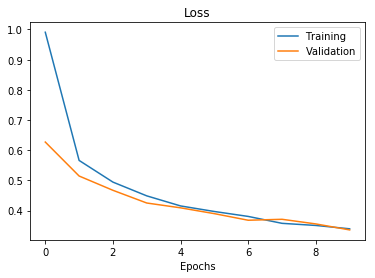

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

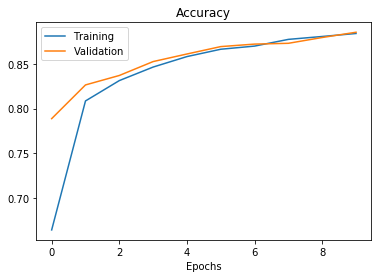

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [26]:
Test_loss,Test_Accuracy = model.evaluate(X_test,y_test_cat,steps=50)

50/50 [==============================] - 3s 57ms/step


In [30]:
print("Test_Loss : {}% Test_Accuracy {}% ".format(np.round(Test_loss * 100,2),np.round(Test_Accuracy * 100,2)))

Test_Loss : 33.62% Test_Accuracy 88.57% 
